# Clean Our Data
1. Consistent school names
2. Drop nan's

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
dfFoyer = pd.read_csv("CleanData/CleanFoyer.csv",header=0)
dfPrograms = pd.read_csv("CleanData/CleanPrograms.csv",header=0)

In [42]:
schools = dfFoyer["school"].unique()
print(schools)

['Gibson Southern' 'Mater Dei' 'Reitz' 'North' 'ECS' 'Central' 'Castle'
 'Mt. Vernon' 'NTI' 'North Posey' 'Harrison' 'Day School' 'Boonville'
 'Wood Memorial' 'Virtual Academy' 'Other' 'Memorial' 'Tecumseh' 'Bosse'
 'Home School' 'Princeton' 'South Spencer' 'Boonville Christian']


### Schools to delete or modify
- perry heights - deleted
- Mater Dei -- moving to north posey = Mater Dei
- MV high school = Mt. Vernon
- nan = deleted
- harrison = Harrison
- mount vernon = Mt. Vernon
- Boonvile and Boovillle = Boonville
- EVSC Virtual = Virtual Academy

## How many students came from each school

In [43]:
# studentVisited=[]
# for eachSchool in schools:
#     schoolCount=0
#     for eachItem in df["school"]:
#         if eachSchool == eachItem:
#             schoolCount+=1
#     studentVisited.append(schoolCount)

count = dfFoyer.value_counts("school")
print(count)

# for i in range(len(schools)):
#     print(f"{schools[i]} had {studentVisited[i]} students")

school
Gibson Southern        65
North                  65
Reitz                  57
Mater Dei              55
Central                46
Castle                 39
NTI                    38
Harrison               25
North Posey            14
Boonville              12
Mt. Vernon             12
ECS                    11
Bosse                  10
Princeton               9
Home School             7
Memorial                7
Tecumseh                7
Other                   6
Virtual Academy         6
South Spencer           5
Wood Memorial           4
Day School              1
Boonville Christian     1
Name: count, dtype: int64


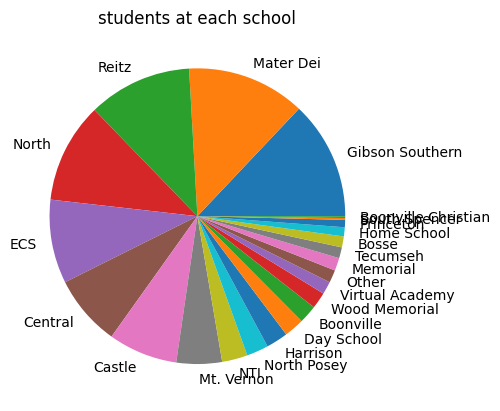

In [31]:
plt.pie(count, labels=schools)
plt.title('students at each school')
plt.show()

Text(0.5, 0, 'school')

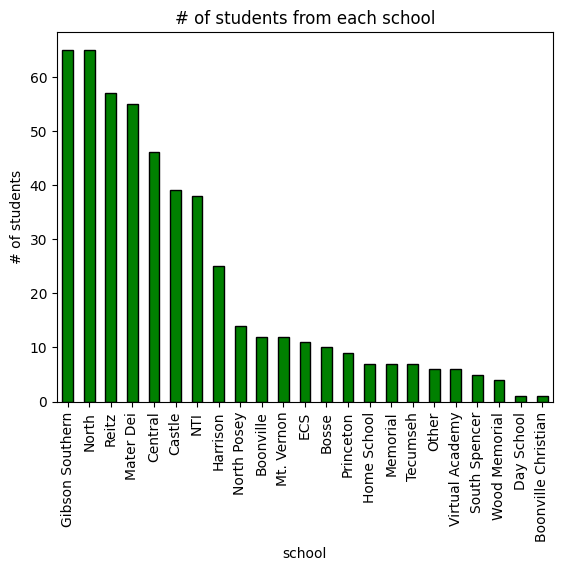

In [33]:
count.plot(kind="bar", color="green", edgecolor="black")
plt.title("# of students from each school")
plt.ylabel("# of students")
plt.xlabel("school")

program
Health Science- Pre-Professional                  138
Diesel Service Technology                          82
Architecture and Engineering Design Technology     82
HVAC -R and Energy Systems                         78
Welding Technology                                 75
Electrical Technology                              71
Automotive Service Technology                      62
Building Construction Technology                   55
Culinary Arts                                      54
Veterinary Science                                 52
Automotive Collision Repair Technology             52
Precision Machine Metalworking Technology          37
Advanced Manufacturing Technology                  36
Public Safety Criminal Justice                     35
Media Communications and Broadcasting              27
Computer Science Software Development              17
Cyber Security                                     17
Graphic Communications Digital Media               15
Health Science- Exer

Text(0.5, 0, 'program')

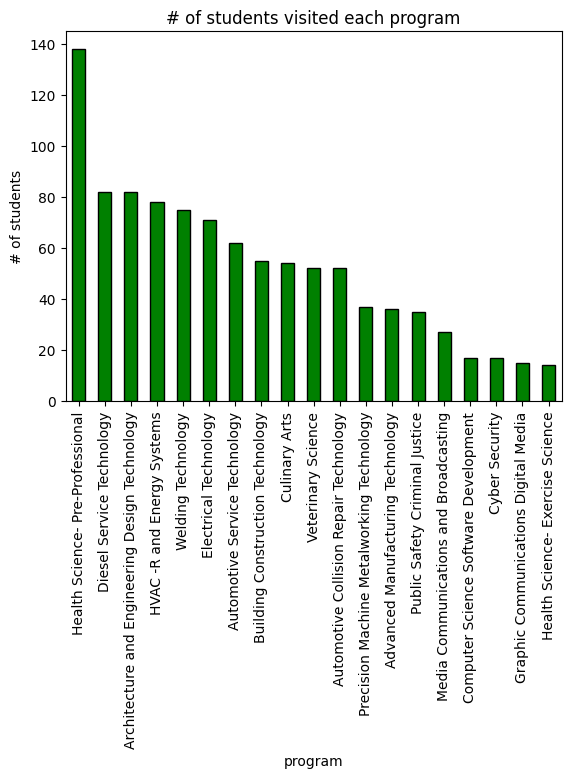

In [28]:
count = dfPrograms.value_counts("program")
print(count)
count.plot(kind="bar", color="green", edgecolor="black")
plt.title("# of students visited each program")
plt.ylabel("# of students")
plt.xlabel("program")

In [29]:
#GPT assisted
#this line will combine the two tables based on the id column and is using an inner join
dfMerge = pd.merge(dfFoyer,dfPrograms,on="id",how="inner")
#this will create a new data set of the programs and the email addresses that visited the program
studsByPrograms = dfMerge.groupby("program")["emailAddress"].apply(list)
print(studsByPrograms)

program
Advanced Manufacturing Technology                 [aesbrookk@mayoclinic.com, crapley2c@hostgator...
Architecture and Engineering Design Technology    [tbrandacci8@fema.gov, bblinckhorneg@tiny.cc, ...
Automotive Collision Repair Technology            [rkeddy4@tripadvisor.com, vwhitticks5@scienced...
Automotive Service Technology                     [vwhitticks5@sciencedirect.com, vwhitticks5@sc...
Building Construction Technology                  [vwhitticks5@sciencedirect.com, chellyere@harv...
Computer Science Software Development             [tbrandacci8@fema.gov, hroache9@independent.co...
Culinary Arts                                     [mceccoli1c@who.int, mceccoli1c@who.int, rwood...
Cyber Security                                    [tbrandacci8@fema.gov, avaugham13@istockphoto....
Diesel Service Technology                         [vwhitticks5@sciencedirect.com, vwhitticks5@sc...
Electrical Technology                             [rkeddy4@tripadvisor.com, vwhitticks5@scie

In [16]:
# Had to modify the name Health Science: ____ to same name without :
dfMerge = pd.merge(dfFoyer,dfPrograms,on="id",how="inner")
studsByPrograms = dfMerge.groupby("program")["emailAddress"].apply(list)
courseName = studsByPrograms.keys()
for i in range(len(courseName)):
    #print(courseName[i])
    dataToWrite=""
    for eachListOfEmails in studsByPrograms.iloc[i]:
        dataToWrite+=eachListOfEmails
    with open(f"ProgramEmails/{courseName[i]}.txt","w+") as file:
        file.write(dataToWrite)
        file.close()

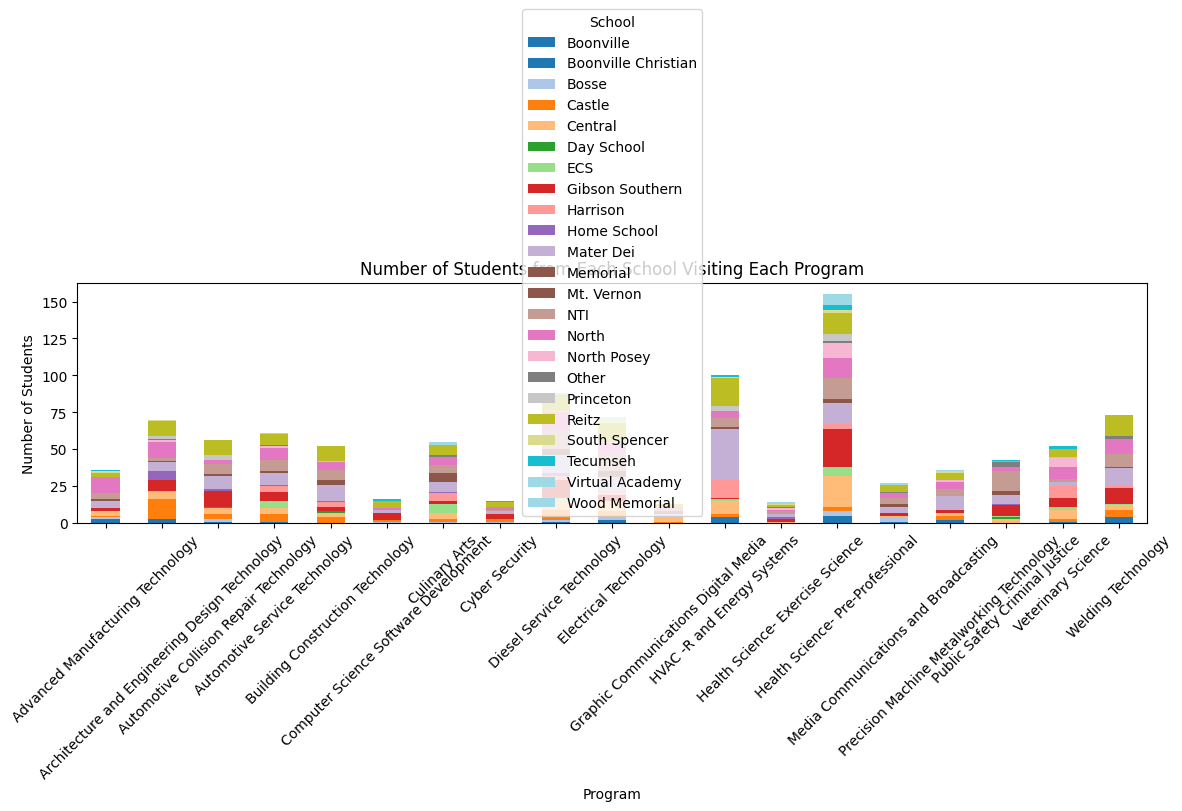

In [3]:
# we need to see the count of schools that visited each course
import pandas as pd
import matplotlib.pyplot as plt

# Load data
dfFoyer = pd.read_csv("CleanData/CleanFoyer.csv", header=0)
dfPrograms = pd.read_csv("CleanData/CleanPrograms.csv", header=0)

# Merge both dataframes on a common key, if needed
# Assuming both have a column like 'StudentID' to join on (adjust as needed)
df = pd.merge(dfFoyer, dfPrograms, left_on='id', right_on='id')

# Group by school and program and count number of students
grouped = df.groupby(['school', 'program']).size().unstack(fill_value=0)

# Plot as a stacked bar chart
grouped.T.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("Number of Students from Each School Visiting Each Program")
plt.ylabel("Number of Students")
plt.xlabel("Program")
plt.xticks(rotation=45)
plt.legend(title="School")
plt.tight_layout()
plt.show()


# Sources
- url

### ChatGPT assistance
- value_counts() = shows the unique items and their occurences
- nunique() = number of unique items